In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp
from matplotlib import patches
from matplotlib import animation
from IPython.display import display, clear_output, HTML

from kjm2601 import obsidian_media_path as path

%matplotlib widget

In [2]:
q,p = sp.symbols('q p')
V = -1/(q**2 + .24) - 2/((q-2)**2 + .3)
T = p**2/2
H = T + V
dHdq = sp.lambdify((q,p), sp.diff(H,q))
dHdp = sp.lambdify((q,p), sp.diff(H,p))
T_func = sp.lambdify(p, T)
V_func = sp.lambdify(q, V)


def odefun(t,y):
    q,p = y
    dqdt = dHdp(q,p)
    dpdt = -dHdq(q,p)
    return np.array([dqdt,dpdt])


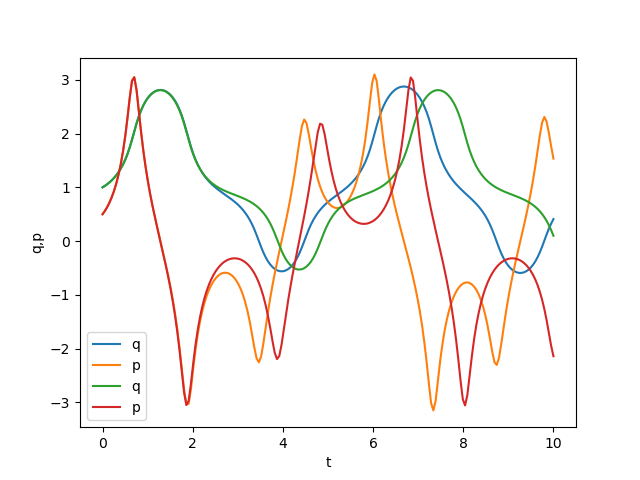

In [4]:
q0 = 1
p0 = 0.5
y0 = [q0, p0]
t0 = 0
t1 = 10
t = np.linspace(t0, t1, 200)
sol = solve_ivp(odefun, [t0, t1], y0, t_eval=t, method='DOP853', rtol=1e-10, atol=1e-10)
plt.plot(sol.t, sol.y[0], label='q')
plt.plot(sol.t, sol.y[1], label='p')
plt.xlabel('t')
plt.ylabel('q,p')
plt.legend()
plt.show()


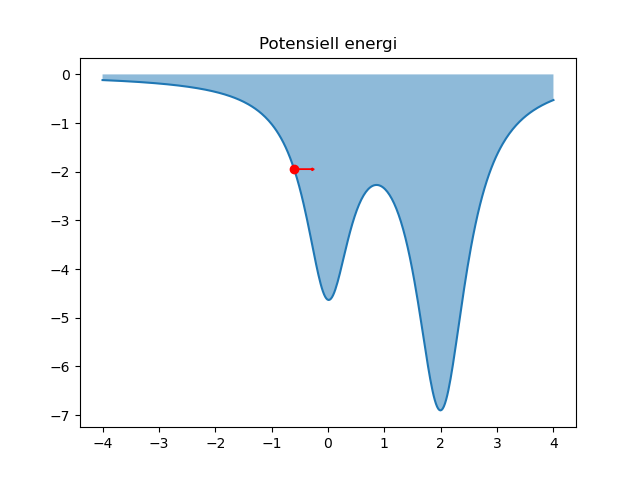

In [5]:
plt.figure()
x = np.linspace(-4,4,400)
# plot V_func with shading under the curve
plt.fill_between(x, V_func(x), alpha=0.5)
plt.plot(x, V_func(x), label='V(q)')

plt.title('Potensiell energi')
q1 = -0.6
plt.plot(q1, V_func(q1), 'ro')

plt.arrow(q1, V_func(q1), -dHdq(q1,0)*.1, 0, head_width=0.05, head_length=0.04, fc='r', ec='r', length_includes_head=True)
    
#plt.annotate('klassisk forbudt', (-1.1, .7), textcoords="offset points", xytext=(0,10), ha='center')

#plt.arrow(q1, V_func(q1), 0, -V_func(q1), head_width=0.05, head_length=0.04, fc='r', ec='r', length_includes_head=True)

plt.savefig(path + 'double_well.svg')
plt.show()